In [101]:
# Import modules for our task

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [102]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

In [103]:
# Import our Script

from user_overview_script import UserOverviewScript

### **Task-1** : User Overview Analysis
In this task we will conduct a user overview analysis to achieve the following sub-tasks: 
*  Identify the top 10 handsets used by the customers.
*  Identify the top 3 handset manufacturers
*  Identify the top 5 handsets per top 3 handset manufacturer
*  Make a short interpretation and recommendation to marketing teams


In [104]:
# Read cleaned Telecom dataset

cleaned_df = pd.read_csv('../data/cleaned_Telecom_data.csv')

In [ ]:
# Instantiate our UserOverviewScript class in user_overview_script 

user_overview_script = UserOverviewScript(cleaned_df)

In [ ]:
# top 10 handset_types used by customers from cleaned_df

top_10_handsets = user_overview_script.get_top_handsets(10)
pd.DataFrame(top_10_handsets)

,Handset Type
Huawei B528S-23A,19754
Apple iPhone 6S (A1688),9401
Apple iPhone 6 (A1586),9004
undefined,8960
Apple iPhone 7 (A1778),6301
Apple iPhone Se (A1723),5176
Apple iPhone 8 (A1905),4985
Apple iPhone Xr (A2105),4562
Samsung Galaxy S8 (Sm-G950F),4504
Apple iPhone X (A1901),3809


In [ ]:
top_10_handsets.index

Index(['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)',
       'undefined', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)',
       'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)',
       'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone X (A1901)'],
      dtype='object')

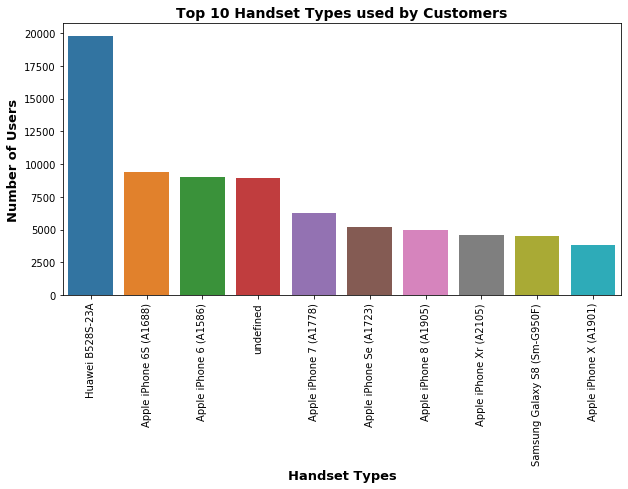

In [ ]:
# Bar graph to display the top 10 Handset Types

plt.figure(figsize=(10,5))
sns.barplot(x=top_10_handsets.index, y=top_10_handsets.values)
plt.title('Top 10 Handset Types used by Customers', size=14, fontweight="bold")
plt.xlabel('Handset Types', size=13, fontweight="bold")
plt.xticks(rotation=90)
plt.ylabel('Number of Users', size=13, fontweight="bold")
plt.show()

In [ ]:
# top 10 manufactures used by customers from cleaned_df

top_3_manufacturers = user_overview_script.get_top_manufacturers(3)
pd.DataFrame(top_3_manufacturers)

,Handset Manufacturer
Apple,59442
Samsung,40689
Huawei,34353


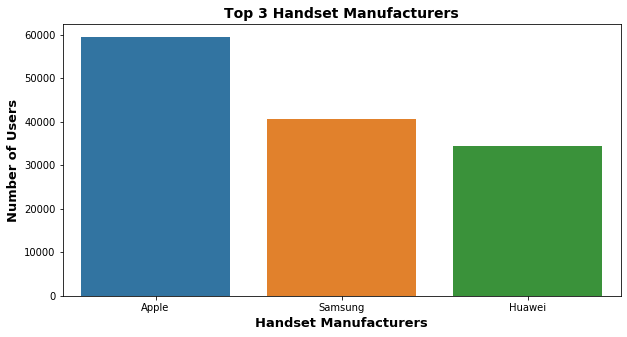

In [ ]:
# Bar graph to display the top 10 Handset Manufacturers

plt.figure(figsize=(10,5))
sns.barplot(x=top_3_manufacturers.index, y=top_3_manufacturers.values)
plt.title('Top 3 Handset Manufacturers', size=14, fontweight="bold")
plt.xlabel('Handset Manufacturers', size=13, fontweight="bold") 
plt.ylabel('Number of Users', size=13, fontweight="bold")
plt.show()

In [ ]:
user_overview_script.get_handset_group()

>>>> Apple <<<<
Handset Type
Apple iPhone 6S (A1688)    6745
Apple iPhone 6 (A1586)     6246
Apple iPhone 7 (A1778)     4676
Apple iPhone Se (A1723)    3745
Apple iPhone 8 (A1905)     3536
Name: MSISDN/Number, dtype: int64

>>>> Samsung <<<<
Handset Type
Samsung Galaxy S8 (Sm-G950F)    3233
Samsung Galaxy J5 (Sm-J530)     2742
Samsung Galaxy A5 Sm-A520F      2702
Samsung Galaxy J3 (Sm-J330)     2582
Samsung Galaxy S7 (Sm-G930X)    2289
Name: MSISDN/Number, dtype: int64

>>>> Huawei <<<<
Handset Type
Huawei B528S-23A                  10617
Huawei P20 Lite Huawei Nova 3E     1527
Huawei E5180                       1183
Huawei P20                         1106
Huawei Y6 2018                      757
Name: MSISDN/Number, dtype: int64



#### Short Interpretation

Based on our results, we have confirmed that Apple is the most preferred manufacturer of the three major phone manufacturers (namely Apple, Samsung and Huawei) from the given dataset. Of its phones, the iPhone 6S (A1688) and iPhone 6 (A1586) are the most popular. Among the Samsung handsets, the Samsung Galaxy S8 (Sm-G950F) is the most popular handset. When we compare the products of the three mobile phone manufacturers individually, we find that the Huawei B528S-23A is the most popular mobile phone by the customers.


### **Task 1.1**

Overview of the users’ behavior on those applications by aggregate per user the following information in the column:
1. Number of xDR sessions
2. Session duration
3. the total download (DL) and upload (UL) data
4. the total data volume (in Bytes) during this session for each application


In [ ]:
# Convert Total UL and Total DL Bytes to MB

cleaned_df['Total UL (Bytes)'] = user_overview_script.convert_bytes_to_megabytes(cleaned_df['Total UL (Bytes)'])
cleaned_df['Total DL (Bytes)'] = user_overview_script.convert_bytes_to_megabytes(cleaned_df['Total DL (Bytes)'])

In [ ]:
# Convert Dur. (ms to Second

dur_sec = user_overview_script.convert_ms_to_sec(cleaned_df['Dur. (ms)'])

In [ ]:
# Rename the columns after conversion

cleaned_df.rename(columns = {'Total UL (Bytes)':'Total UL (MB)', 'Total DL (Bytes)':'Total DL (MB)', 'Dur. (ms)': 'Dur. (sec)'}, inplace = True)

In [ ]:

cleaned_df['Total Data (MB)'] = cleaned_df['Total DL (MB)'] + cleaned_df['Total UL (MB)']

aggrigate = {"Bearer Id": 'count', 'Dur. (sec)':'sum', 'Total UL (MB)': 'sum', 'Total DL (MB)': 'sum', 'Total Data (MB)': 'sum'}
aggrigation_result = cleaned_df.groupby('MSISDN/Number').agg(aggrigate)
aggrigation_result.head()

,Bearer Id,Dur. (sec),Total UL (MB),Total DL (MB),Total Data (MB)
MSISDN/Number,,,,,
33601001722.000,1,116720.000,36.053,842.637,878.691
33601001754.000,1,181230.000,36.104,120.755,156.860
33601002511.000,1,134969.000,39.307,556.660,595.966
33601007832.000,1,49878.000,20.328,401.993,422.321
33601008617.000,2,37104.000,94.281,1363.130,1457.411
